<div align = "center">
    <img src = "https://github.com/AndersonAyache/AluraVoz/blob/main/IMG/Logo_Alura_Voz.png?raw=true" alt = "Alura Voz"/>
</div>

# Carregando os dados

In [1]:
# importando as bibliotecas

# pandas
import pandas as pd

#numpy
import numpy as np

#sklearn
from sklearn.preprocessing import LabelEncoder

# gráficos
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importando o DataFrame já tratato
clientes = pd.read_json('../dados/Telco-Customer-Churn-Limpo.json')

In [3]:
# configurações inicias
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)

In [4]:
# visualizando o DataFrame
clientes.head()

,Churn,genero,senior,conjuge,dependentes,permanencia,ServicoTelefonico,MultiplasLinhas,ServicoInternet,SeguroOnline,OnlineBackup,ProtecaoDoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,contrato,FaturaOnline,MetodoDePagamento,GastoMensal,GastoTotal,GastoDiario
0,Não,Mulher,0,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,UmAno,Sim,EnvioDeCheque,65.6,593.30,2.19
1,Não,Homem,0,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,EnvioDeCheque,59.9,542.40,2.00
2,Sim,Homem,0,Não,Não,4,Sim,Não,FibraOptica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,ChequeEletronico,73.9,280.85,2.46
3,Sim,Homem,1,Sim,Não,13,Sim,Não,FibraOptica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,ChequeEletronico,98.0,1237.85,3.27
4,Sim,Mulher,1,Sim,Não,3,Sim,Não,FibraOptica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,EnvioDeCheque,83.9,267.40,2.80


# Analisando a taxa de cancelamento total

In [5]:
# separando os dados que somente tiveram cancelamento
cancelamentos = clientes.query("Churn == 'Sim'")
cancelamentos.head()

,Churn,genero,senior,conjuge,dependentes,permanencia,ServicoTelefonico,MultiplasLinhas,ServicoInternet,SeguroOnline,OnlineBackup,ProtecaoDoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,contrato,FaturaOnline,MetodoDePagamento,GastoMensal,GastoTotal,GastoDiario
2,Sim,Homem,0,Não,Não,4,Sim,Não,FibraOptica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,ChequeEletronico,73.9,280.85,2.46
3,Sim,Homem,1,Sim,Não,13,Sim,Não,FibraOptica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,ChequeEletronico,98.0,1237.85,3.27
4,Sim,Mulher,1,Sim,Não,3,Sim,Não,FibraOptica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,EnvioDeCheque,83.9,267.40,2.80
18,Sim,Homem,1,Não,Não,45,Sim,Não,DSL,Sim,Não,Sim,Não,Não,Sim,UmAno,Não,CartaoCredito,62.7,2791.50,2.09
19,Sim,Homem,1,Não,Não,1,Não,SemTelefone,DSL,Não,Não,Não,Não,Não,Não,Mensal,Sim,ChequeEletronico,25.1,25.10,0.84


In [6]:
# criando o Dataframe com a contagem de valores da coluna churn
df_churn = pd.DataFrame(clientes['Churn'].value_counts())

# criando a coluna percentual de cancelamento
df_churn['Percentual'] = df_churn['Churn'] / clientes.shape[0]

# definindo a formatação da coluna de percentual 
df_churn.style.format({'Percentual': '{:.2%}'})

,Churn,Percentual
Não,5174,73.46%
Sim,1869,26.54%


Uma taxa de cancelamento de aproximadamente 26% é uma taxa muito elevada.

In [7]:
# criando um variável com a contagem do total de cancelamentos
total_de_churn = clientes.query("Churn == 'Sim'").shape[0]

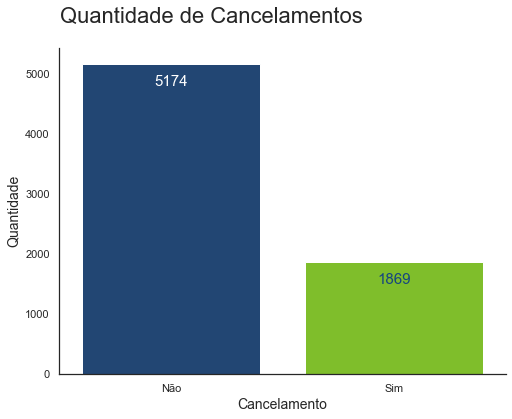

In [8]:
# escondendo os eixos da direta e do topo
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

# definindo o tema e o tamanho do gráfico
sns.set_theme(style="white", rc=custom_params)
plt.figure(figsize=(8,6))

# plotando o gráfico
g = sns.countplot(x='Churn', data=clientes, palette=['#154580','#82D712'])

# adicionando título e rótulos aos eixos
g.set_title('Quantidade de Cancelamentos',x=0.34 ,ha= 'center' , fontsize = 22, pad=25)
g.set_xlabel('Cancelamento', fontsize=14)
g.set_ylabel('Quantidade', fontsize=14)

# adicionando o valor a cada categoria 
g.annotate(clientes.query("Churn == 'Não'").shape[0],xy=(0,4800), ha = "center" ,fontsize=15, color='w')
g.annotate(clientes.query("Churn == 'Sim'").shape[0],xy=(1,1500), ha = "center" ,fontsize=15, color='#154580')

# exibindo o Gráfico
plt.show()

# Verificação por serviços

## Analisando a Taxa de cancelamento por serviço de telefone

In [9]:
# criando uma tabela cruzada com as informações do serviço de telefone dos clientes e o cancelamento
churn_telefones = pd.crosstab(clientes['ServicoTelefonico'],clientes['Churn'])

# visualizando
churn_telefones

Churn,Não,Sim
ServicoTelefonico,,
Não,512,170
Sim,4662,1699


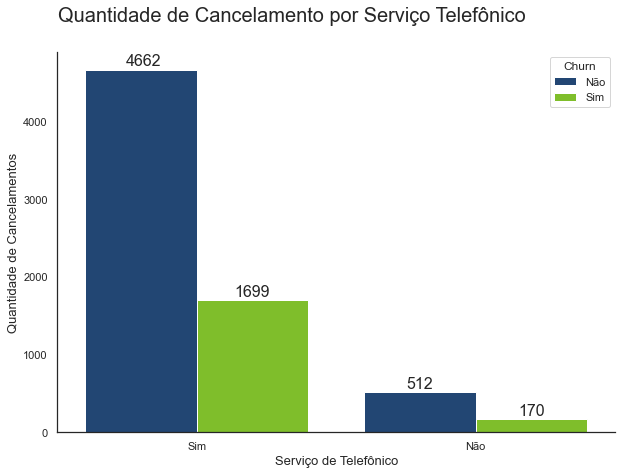

In [10]:
# definindo o tamanho do gráfico
plt.figure(figsize=(10,7))

# plotando o gráfico
g = sns.countplot(x = 'ServicoTelefonico',hue='Churn' ,data= clientes, palette=['#154580','#82D712'])

# adicionando título e rótulos aos eixos
g.set_title('Quantidade de Cancelamento por Serviço Telefônico', x=0.42, ha="center" ,fontsize=20, pad=30)
g.set_xlabel('Serviço de Telefônico', fontsize=13)
g.set_ylabel('Quantidade de Cancelamentos', fontsize=13)


# adicionando o valor a cada categoria 
g.annotate(clientes.query("Churn == 'Não' & ServicoTelefonico == 'Sim'").shape[0],
           xy = (-0.19,clientes.query("Churn == 'Não' & ServicoTelefonico == 'Sim'").shape[0]+50),
                 ha ="center" ,fontsize = 16)
g.annotate(clientes.query("Churn == 'Sim' & ServicoTelefonico == 'Sim'").shape[0],
           xy = (.2,clientes.query("Churn == 'Sim' & ServicoTelefonico == 'Sim'").shape[0]+50),
                 ha ="center" ,fontsize = 16)

g.annotate(clientes.query("Churn == 'Não' & ServicoTelefonico == 'Não'").shape[0],
           xy = (0.8,clientes.query("Churn == 'Não' & ServicoTelefonico == 'Não'").shape[0]+50),
                 ha ="center" ,fontsize = 16)
g.annotate(clientes.query("Churn == 'Sim' & ServicoTelefonico == 'Não'").shape[0],
           xy = (1.2,clientes.query("Churn == 'Sim' & ServicoTelefonico == 'Não'").shape[0]+50),
                 ha ="center" ,fontsize = 16)

# exibindo o Gráfico
plt.show()

In [11]:
qt_telefonico = round(churn_telefones['Sim'].iloc[1]/churn_telefones['Sim'].iloc[0],2)
print(f'''A quantidade de clientes que usam o serviço telefônico tem uma taxa de cancelamento {qt_telefonico} vezes mais 
em relação aos que não usam.''') 

A quantidade de clientes que usam o serviço telefônico tem uma taxa de cancelamento 9.99 vezes mais 
em relação aos que não usam.


## Analisando a Taxa de cancelamento por seriço de internet

In [12]:
# separando os clientes que usam internet 
com_internet = clientes.query("ServicoInternet != 'Não'")
# separando os clientes que não usam internet 
sem_internet = clientes.query("ServicoInternet == 'Não'")

É preciso fazer uma análise separada dos que usam o serviço de internet e os não a usam.

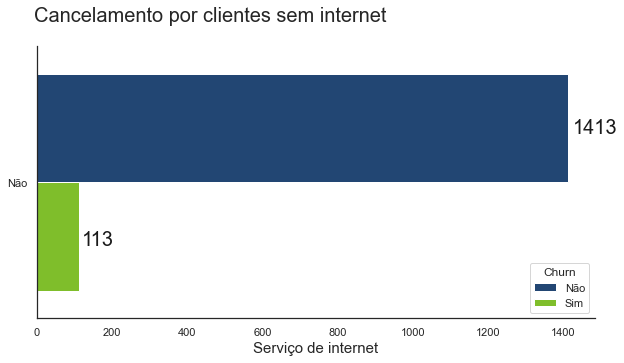

In [13]:
# definindo o tamanho do gráfico
plt.figure(figsize=(10,5))

# plotando o gráfico
ax = sns.countplot(data=sem_internet, y = 'ServicoInternet',hue = 'Churn',palette=['#154580','#82D712'])

# adicionando título e rótulos aos eixos
ax.set_title('Cancelamento por clientes sem internet', x = 0.31, ha = "center", fontsize=20, pad=25)
ax.set_ylabel('')
ax.set_xlabel('Serviço de internet', fontsize= 15)

# adicionando o valor a cada categoria 
ax.annotate(int(sem_internet.query("Churn == 'Não'").shape[0]),
            xy = (int(sem_internet.query("Churn == 'Não'").shape[0])+70,-0.18),
            color = 'k',ha ="center", fontsize = 20)
ax.annotate(int(sem_internet.query("Churn == 'Sim'").shape[0]),
            xy = (int(sem_internet.query("Churn == 'Sim'").shape[0])+50, 0.23),
            color = 'k',ha ="center", fontsize = 20)

# exibindo o Gráfico
plt.show()

## Tipos de internet

In [14]:
# list comprehension para os nomes 
nomes = [i for i in clientes['ServicoInternet'].unique()]

# list comprehension para os valores
valores = [clientes.query(f'ServicoInternet == "{i}" & Churn == "Sim"').shape[0] for i in nomes]

# criando o DataFrame
tipo_internet = pd.DataFrame(index = nomes, data = valores)

# renomeando a coluna
tipo_internet.rename(columns = {0:'Qt de Cancelamentos'}, inplace = True)

# criando a coluna percentual
tipo_internet['Percentual'] = tipo_internet['Qt de Cancelamentos']/total_de_churn

# estilizando a coluna percentual
tipo_internet.style\
            .format({'Percentual':'{:.2%}'})

,Qt de Cancelamentos,Percentual
DSL,459,24.56%
FibraOptica,1297,69.40%
Não,113,6.05%


In [15]:
clientes.query("ServicoInternet == 'DSL' and Churn == 'Não' ").shape[0]

1962

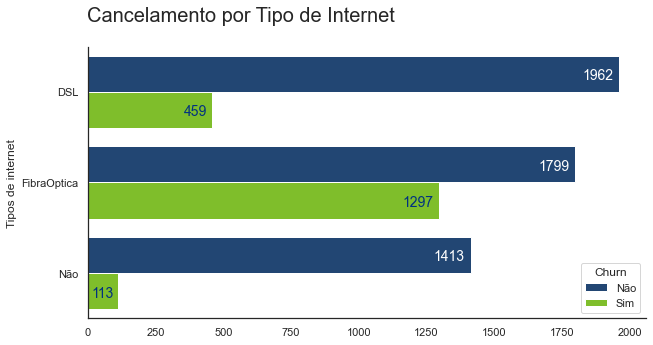

In [16]:
# definindo o tamanho do gráfico
plt.figure(figsize=(10,5))

# plotando o gráfico
g = sns.countplot(y='ServicoInternet', hue='Churn', data=clientes, palette=['#154580','#82D712'])

# adicionando título e rótulos aos eixos
g.set_title('Cancelamento por Tipo de Internet', x = 0.275 ,fontsize =20, ha = 'center',pad=25)
g.set_xlabel('', fontsize=12)
g.set_ylabel('Tipos de internet', fontsize=12)

# adicionando o valor a cada categoria 
g.annotate(clientes.query("ServicoInternet == 'DSL' and Churn == 'Não' ").shape[0],
           xy=(clientes.query("ServicoInternet == 'DSL' and Churn == 'Não' ").shape[0]-80,-0.18), 
           fontsize=14, ha= 'center',va = 'center' ,color='w')

g.annotate(clientes.query("ServicoInternet == 'DSL' and Churn == 'Sim' ").shape[0],
           xy=(clientes.query("ServicoInternet == 'DSL' and Churn == 'Sim' ").shape[0]-60,0.22), 
           fontsize=14, ha='center', va = 'center' ,color='#003180')


g.annotate(clientes.query("ServicoInternet == 'FibraOptica' and Churn == 'Não' ").shape[0],
           xy=(clientes.query("ServicoInternet == 'FibraOptica' and Churn == 'Não' ").shape[0]-80,0.82), 
           fontsize=14, ha='center', va='center' ,color='w')

g.annotate(clientes.query("ServicoInternet == 'FibraOptica' and Churn == 'Sim' ").shape[0],
           xy=(clientes.query("ServicoInternet == 'FibraOptica' and Churn == 'Sim' ").shape[0]-80,1.22), 
           fontsize=14, ha = 'center', va = 'center' ,color='#003180')

g.annotate(clientes.query("ServicoInternet == 'Não' and Churn == 'Não' ").shape[0],
           xy=(clientes.query("ServicoInternet == 'Não' and Churn == 'Não' ").shape[0] -80,1.82), 
           fontsize=14, ha = 'center', va = 'center' ,color='w')

g.annotate(clientes.query("ServicoInternet == 'Não' and Churn == 'Sim' ").shape[0],
           xy=(clientes.query("ServicoInternet == 'Não' and Churn == 'Sim' ").shape[0]-60,2.22), 
           fontsize=14, ha = 'center', va = 'center' ,color='#003180')

# salvando o gráfico 
plt.savefig('../IMG/Cancelamento por Tipo de Serviço', 
            dpi = 300, bbox_inches = 'tight')

# exibindo o gráfico
plt.show()

In [17]:
churn_fibra =  cancelamentos.query('ServicoInternet == "FibraOptica"').shape[0]
churn_dsl = cancelamentos.query('ServicoInternet == "DSL" ').shape[0]
prop_fibra_dsl = round(churn_fibra / churn_dsl,2)
print(f'A quantidade de cancelamento de clientes que usam fibra óptica é {prop_fibra_dsl} maior dos que usam DSL')

A quantidade de cancelamento de clientes que usam fibra óptica é 2.83 maior dos que usam DSL


### Analise por outros serviços de internet

In [18]:
# list comprehension para os nomes 
servico_internet = ['SeguroOnline', 'OnlineBackup', 'ProtecaoDoDispositivo','SuporteTecnico', 'StreamingTV', 'StreamingFilmes']

# list comprehension para os valores
valores = [cancelamentos.query(f'{i} == "Sim"').shape[0] for i in servico_internet]

# criando o DataFrame
df_servico_internet = pd.DataFrame(index = servico_internet, data = valores)

# renomeando a coluna
df_servico_internet.rename(columns = {0:'Qt de Cancelamento'}, inplace = True)

# criando a coluna percentual
df_servico_internet['Percentual'] = df_servico_internet['Qt de Cancelamento'] / total_de_churn

# estilizando a coluna percentual
df_servico_internet.style\
            .format({'Percentual':'{:.2%}'})\
            .background_gradient(cmap='GnBu', subset = 'Percentual')


,Qt de Cancelamento,Percentual
SeguroOnline,295,15.78%
OnlineBackup,523,27.98%
ProtecaoDoDispositivo,545,29.16%
SuporteTecnico,310,16.59%
StreamingTV,814,43.55%
StreamingFilmes,818,43.77%


# Verificação por Informações gerais

## Análise por Gênero

In [19]:
# estilizando a coluna percentual
genero = [i for i in clientes['genero'].unique()]
valores = [cancelamentos.query(f'genero == "{i}"').shape[0] for i in clientes['genero'].unique()]
churn_genero = pd.DataFrame(index = genero, data = valores)
churn_genero.rename(columns={0:'Genero'}, inplace=True)
churn_genero['Percentual'] = churn_genero['Genero'] / total_de_churn
churn_genero.style.format({'Percentual':'{:.2%}'})

,Genero,Percentual
Mulher,939,50.24%
Homem,930,49.76%


Não existe grande diferença entre cancelamento por gênero do cliente.

## Análisando por Idade

In [20]:
# list comprehension para os nomes 
senior = [i for i in clientes['senior'].unique()]

# list comprehension para os valores 
valores = [cancelamentos.query(f'senior == {i}').shape[0] for i in senior]

# criando o DataFrame
churn_senior = pd.DataFrame(index = senior, data = valores)

# renomeando a coluna
churn_senior.rename(columns={0:'Senior'}, index = {0:'Não',1:'Sim'}, inplace=True)

# criando a coluna percentual
churn_senior['Percentual'] = churn_senior['Senior'] / total_de_churn

# estilizando a coluna percentual
churn_senior.style.format({'Percentual':'{:.2%}'})

,Senior,Percentual
Não,1393,74.53%
Sim,476,25.47%


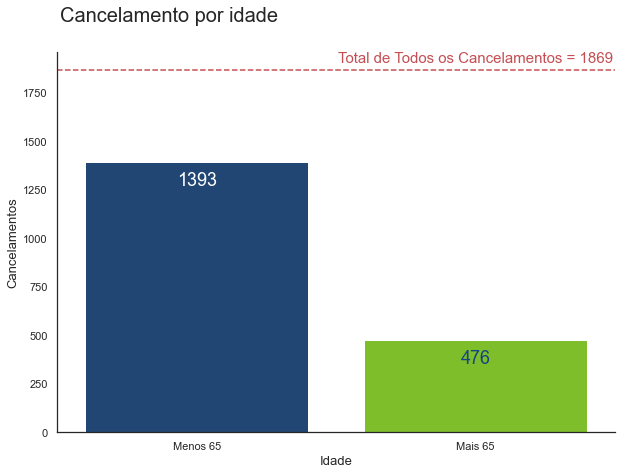

In [21]:
# definindo o tamanho do gráfico
plt.figure(figsize=(10,7))

# plotando o gráfico
g = sns.countplot(x = 'senior',data= cancelamentos, palette=['#154580','#82D712'])

# adicionando título e rótulos aos eixos
g.set_title('Cancelamento por idade', x=0.2, ha="center" ,fontsize=20, pad=30)
g.set_xlabel('Idade', fontsize=13)
g.set_ylabel('Cancelamentos', fontsize=13)

# adicionando o valor a cada categoria 
g.annotate(churn_senior['Senior'].loc['Não'],
           xy = (0,churn_senior['Senior'].loc['Não']-120),
                 ha ="center" ,fontsize = 18, color ='w')

g.annotate(churn_senior['Senior'].loc['Sim'],
           xy = (1,churn_senior['Senior'].loc['Sim']-120),
                 ha ="center" ,fontsize = 18, color = '#154580')

# renomeando o eixo x
g.set_xticklabels(['Menos 65', 'Mais 65'])

# traçando a linha do total de cancelamentos
g.axhline(total_de_churn, color='r', linestyle='--')
g.annotate(f'Total de Todos os Cancelamentos = {total_de_churn}',
           xy = (1,total_de_churn+40), color='r', fontsize=15, ha='center')

# salvando o gráfico 
plt.savefig('../IMG/cancelamento_por_idade.png', 
            dpi = 300, bbox_inches = 'tight')

# exibindo o gráfico
plt.show()

Os clientes com idade maior que 65 anos, tem uma taxa de cancelamento menor, sendo assim a idade sênior não é um fator relevante.

## Analise por Cônjuge

In [22]:
# list comprehension para os nomes 
conjuge = [i for i in clientes['conjuge'].unique()]

# list comprehension para os valores
valores = [cancelamentos.query(f'conjuge == "{i}"').shape[0] for i in conjuge]

# criando o DataFrame
churn_conjuge = pd.DataFrame(index = conjuge, data = valores)

# renomeando a coluna
churn_conjuge.rename(columns={0:'conjuge'}, inplace=True)

# criando a coluna percentual
churn_conjuge['Percentual'] = churn_conjuge['conjuge'] / total_de_churn

# estilizando a coluna percentual
churn_conjuge.style.format({'Percentual':'{:.2%}'})

,conjuge,Percentual
Sim,669,35.79%
Não,1200,64.21%


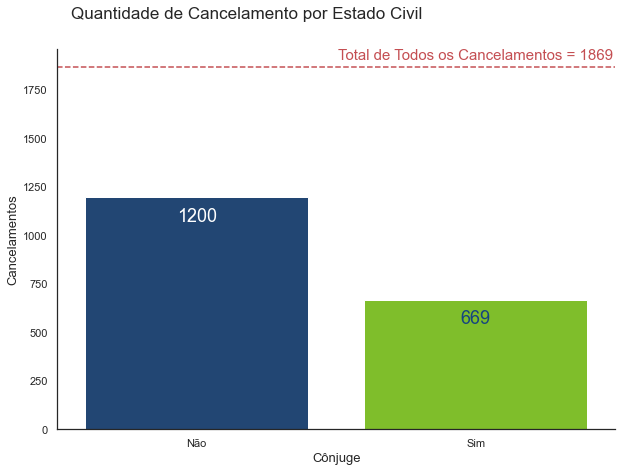

In [23]:
# definindo o tamanho do gráfico
plt.figure(figsize=(10,7))

# plotando o gráfico
g = sns.countplot(x = 'conjuge', data= cancelamentos, palette=['#154580','#82D712'])

# adicionando título e rótulos aos eixos
g.set_title('Quantidade de Cancelamento por Estado Civil', x =0.34 , ha = 'center',fontsize=17, pad=30)
g.set_xlabel('Cônjuge', fontsize=13)
g.set_ylabel('Cancelamentos', fontsize=13)

# adicionando o valor a cada categoria 
g.annotate(int(churn_conjuge['conjuge'].loc['Não']), 
           xy = (0,churn_conjuge['conjuge'].loc['Não']-100),
           fontsize = 18,ha='center', va = "center",color='w')

g.annotate(int(churn_conjuge['conjuge'].loc['Sim']), 
           xy = (1,churn_conjuge['conjuge'].loc['Sim']-100),
           fontsize = 18,ha='center', va = "center",color='#154580')

# traçando a linha do total de cancelamentos
g.axhline(total_de_churn, color='r', linestyle='--')
g.annotate(f'Total de Todos os Cancelamentos = {total_de_churn}',
           xy = (1,total_de_churn+40), color='r', fontsize=15, ha='center')

# salvando o gráfico 
plt.savefig('../IMG/quantidade_de_cancelamento_por_estado_civil.png', 
            dpi = 300, bbox_inches = 'tight')

# exibindo o gráfico
plt.show()

## Analise por dependêntes 

In [24]:
# list comprehension para os nomes 
dependentes = [i for i in clientes['dependentes'].unique()]

# list comprehension para os valores
valores = [clientes.query(f'dependentes == "{i}" & Churn == "Sim"').shape[0] for i in dependentes]

# criando o DataFrame
churn_dependentes = pd.DataFrame(index = dependentes, data = valores)

# renomeando a coluna
churn_dependentes.rename(columns={0:'dependentes'}, inplace=True)

# criando a coluna percentual
churn_dependentes['Percentual'] = churn_dependentes['dependentes'] / total_de_churn

# estilizando a coluna percentual
churn_dependentes.style.format({'Percentual':'{:.2%}'})

,dependentes,Percentual
Sim,326,17.44%
Não,1543,82.56%


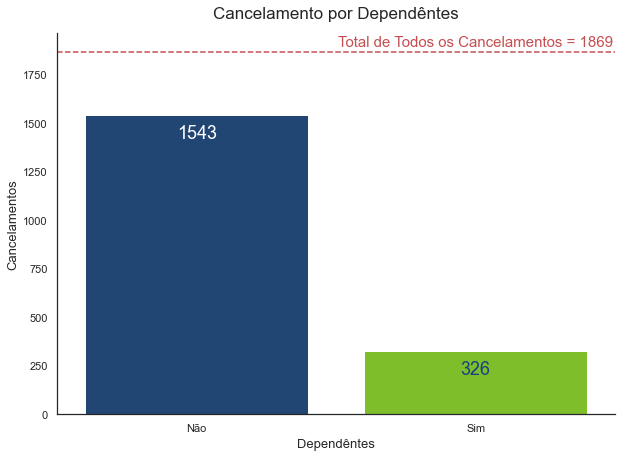

In [25]:
# definindo o tamanho do gráfico
plt.figure(figsize=(10,7))

# plotando o gráfico
g = sns.countplot(x = 'dependentes', data= cancelamentos, palette=['#154580','#82D712'])

# adicionando título e rótulos aos eixos
g.set_title('Cancelamento por Dependêntes', fontsize=17, pad=15)
g.set_xlabel('Dependêntes', fontsize=13)
g.set_ylabel('Cancelamentos', fontsize=13)

# adicionando o valor a cada categoria 
g.annotate(churn_dependentes['dependentes'].loc['Não'], fontsize = 18, ha = 'center',
           xy = (0,churn_dependentes['dependentes'].loc['Não']-120), color='w')

g.annotate(churn_dependentes['dependentes'].loc['Sim'], fontsize = 18, ha = 'center',
           xy = (1,churn_dependentes['dependentes'].loc['Sim']-120), color='#154580')

# traçando a linha do total de cancelamentos
g.axhline(total_de_churn, color='r', linestyle='--')
g.annotate(f'Total de Todos os Cancelamentos = {total_de_churn}',
           xy = (1,total_de_churn+30), color='r',
           ha = 'center',fontsize = 15)

# salvando o gráfico 
plt.savefig('../IMG/cancelamento_por_dependentes.png', 
            dpi = 300, bbox_inches = 'tight')

# exibindo o gráfico
plt.show()

# Análise por Gastos

## Gasto Mensal

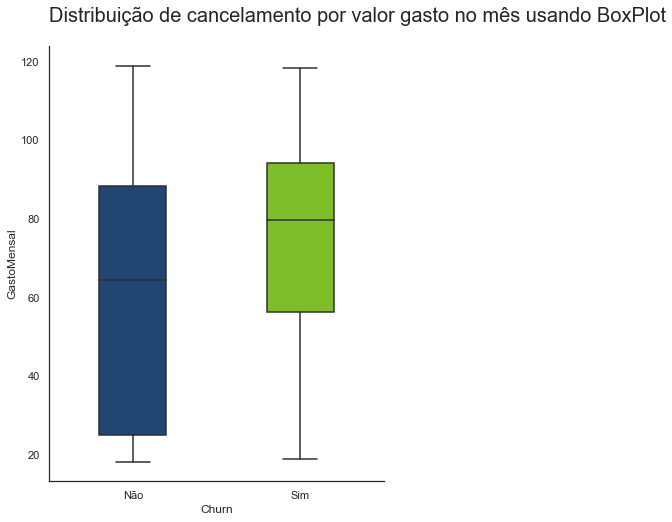

In [26]:
# definindo o tamanho do gráfico
plt.figure(figsize = (6,8))

# plotando o gráfico
g = sns.boxplot(data=clientes, y = 'GastoMensal', x = 'Churn' ,palette= ['#154580','#82D712'], width=0.4)

# adicionando título e rótulos aos eixos
g.set_title('Distribuição de cancelamento por valor gasto no mês usando BoxPlot', 
            fontsize = 20 ,pad= 30, ha ='center', va = 'center', x = 0.92)

# salvando o gráfico 
plt.savefig('../IMG/boxplot_gasto_mensal.png', 
            dpi = 300, bbox_inches = 'tight')

# exibindo o gráfico
plt.show()

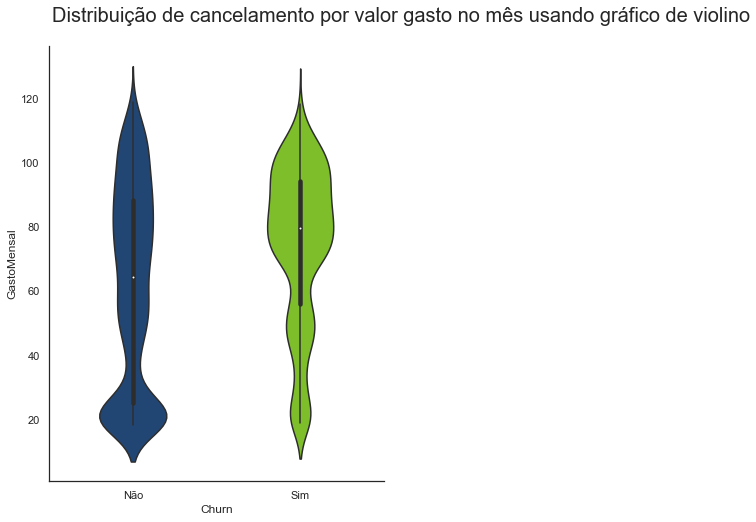

In [27]:
# definindo o tamanho do gráfico
plt.figure(figsize = (6,8))

# plotando o gráfico
g = sns.violinplot(data=clientes, y = 'GastoMensal', x = 'Churn', palette= ['#154580','#82D712'], width=0.4)

# adicionando título e rótulos aos eixos
g.set_title('Distribuição de cancelamento por valor gasto no mês usando gráfico de violino', 
            fontsize = 20 ,pad= 30, ha ='center', va = 'center', x = 1.05)

# salvando o gráfico 
plt.savefig('../IMG/violino_gasto_mensal.png', 
            dpi = 300, bbox_inches = 'tight')


# exibindo o gráfico
plt.show()

Uma análise dos dados revela que existe uma tendência entre os usuários que cancelaram a assinatura de gastarem valores mensais mais elevados, geralmente acima do valor médio de R$ 65,00.

## Gasto Total

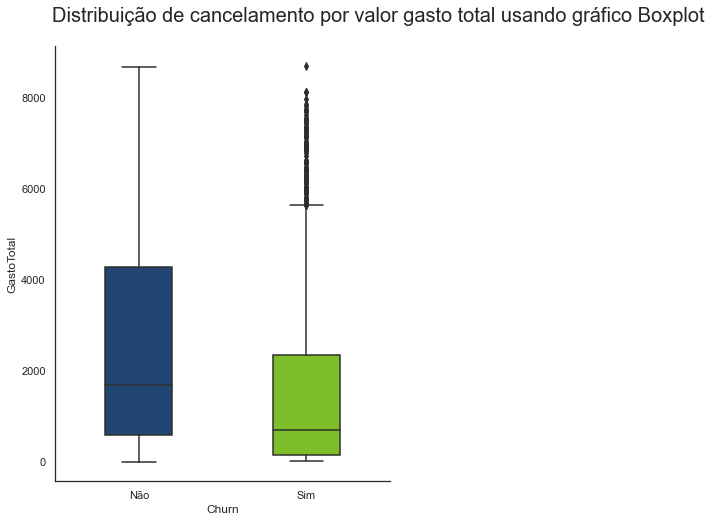

In [28]:
# definindo o tamanho do gráfico
plt.figure(figsize = (6,8))

# plotando o gráfico
g = sns.boxplot(data=clientes, y = 'GastoTotal', x = 'Churn', palette= ['#154580','#82D712'], width=0.4)

# adicionando título e rótulos aos eixos
g.set_title('Distribuição de cancelamento por valor gasto total usando gráfico Boxplot', 
            fontsize = 20 ,pad= 30, ha ='center', va = 'center', x = 0.965)

# salvando o gráfico 
plt.savefig('../IMG/boxplot_gasto_total.png', 
            dpi = 300, bbox_inches = 'tight')

# exibindo o gráfico
plt.show()

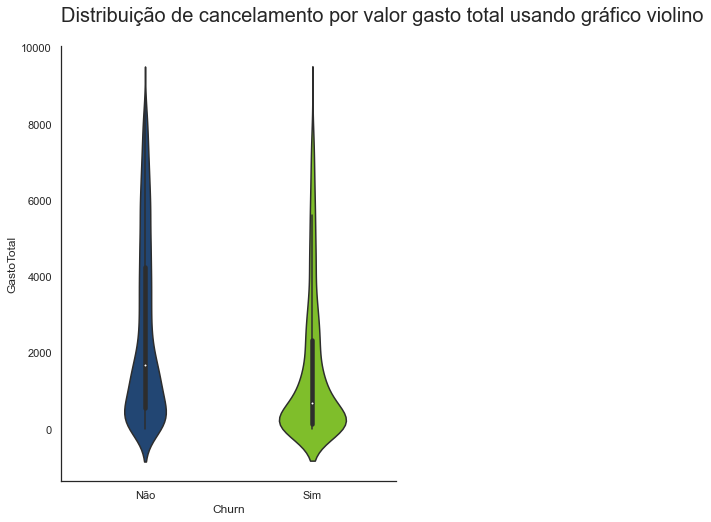

In [29]:
# definindo o tamanho do gráfico
plt.figure(figsize = (6,8))

# plotando o gráfico
g = sns.violinplot(data=clientes, y = 'GastoTotal', x = 'Churn', palette= ['#154580','#82D712'], width=0.4)

# adicionando título e rótulos aos eixos
g.set_title('Distribuição de cancelamento por valor gasto total usando gráfico violino', 
            fontsize = 20 ,pad= 30, ha ='center', va = 'center', x = 0.96)

# salvando o gráfico 
plt.savefig('../IMG/violino_gasto_total.png', 
            dpi = 300, bbox_inches = 'tight')

# exibindo o gráfico
plt.show()

A análise dos gastos totais dos clientes indicou que, os que cancelam possuem gastos totais menores, o que pode estar relacionado ao período em que eles permaneceram como clientes.

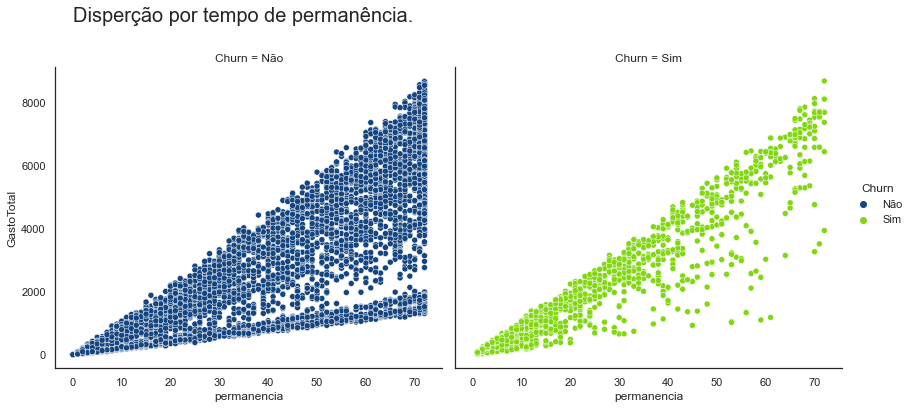

In [30]:
g = sns.relplot(data = clientes, x = 'permanencia', y = 'GastoTotal',
                hue = 'Churn' , col= 'Churn',palette=['#154580','#82D712'],
               aspect=1.15, height=5.2)

g.fig.suptitle('Disperção por tempo de permanência.', fontsize=20, x = 0.275, y = 1.09)

# salvando o gráfico 
plt.savefig('../IMG/dispercao_gasto_total_permanecia.png', 
            dpi = 300, bbox_inches = 'tight')


plt.show()

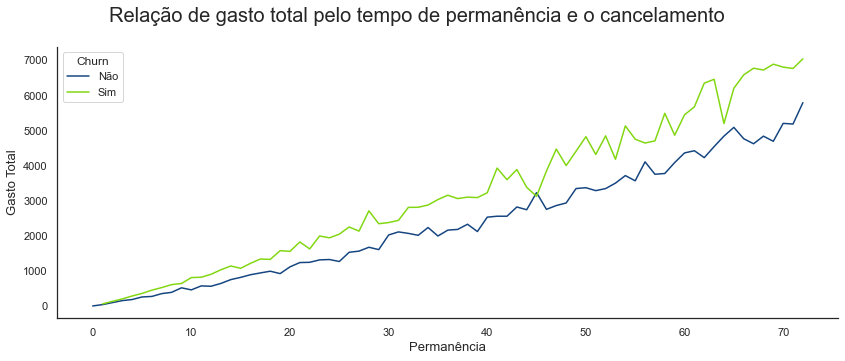

In [31]:
# definindo o tamanho do gráfico
plt.figure(figsize = (14,5))

# plotando o gráfico
g = sns.lineplot(data=clientes, y = 'GastoTotal', x = 'permanencia', err_style=None,
                 hue = 'Churn', palette = ['#154580','#82D712'])

# adicionando título e rótulos aos eixos
g.set_title('Relação de gasto total pelo tempo de permanência e o cancelamento', 
            fontsize = 20 ,pad= 30, ha ='center', va = 'center', x = 0.46)
g.set_xlabel('Permanência', fontsize=13)
g.set_ylabel('Gasto Total', fontsize=13)


# salvando o gráfico 
plt.savefig('../IMG/relacao_gasto_total_permanencia_01.png', 
            dpi = 300, bbox_inches = 'tight')


# exibindo o gráfico
plt.show()

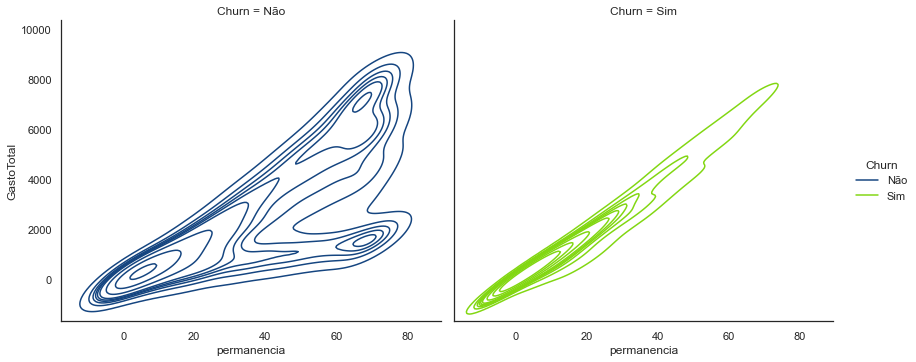

In [32]:
# plotando o gráfico
g = sns.displot(x = 'permanencia', y = 'GastoTotal', hue = 'Churn', 
            col = 'Churn' ,data = clientes, kind='kde', palette=['#154580','#82D712'], height=5.2 ,aspect=1.15)

# salvando o gráfico 
plt.savefig('../IMG/relacao_gasto_total_permanencia_02.png', 
            dpi = 300, bbox_inches = 'tight')

# exibindo o gráfico
plt.show()

Os dados mostram que os clientes que não cancelaram seus serviços apresentam uma distribuição mais estável de gastos, em relação ao tempo de permanência, enquanto os que cancelaram apresentam uma tendência mais linear. Isso indica uma relação entre o tempo de permanência e o gasto total, podendo ser um fator determinante para o cancelamento dos serviços.

# Análise de correlação

In [33]:
label_encoder = LabelEncoder()
correlacao_clientes = clientes.copy()
categoricas = clientes.select_dtypes(include='object')

for i in categoricas.columns:
    correlacao_clientes[i] = label_encoder.fit_transform(clientes[i])
correlacao_clientes.to_json('E:/Cursos/Alura/Data Science/1º Challenges/dados/correlacao_de_variaveis.json')

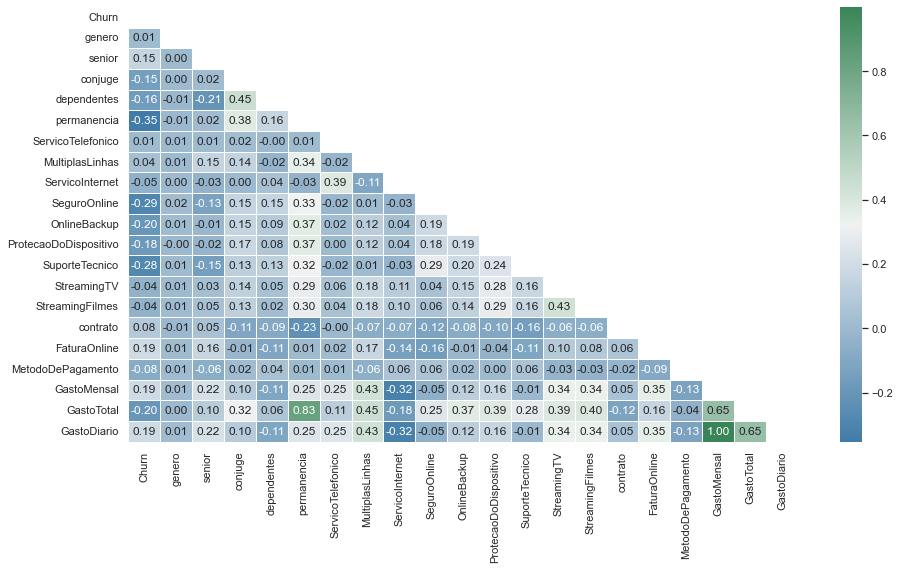

In [34]:
# criando a mascara
mask = np.zeros_like(correlacao_clientes.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# configurando o tamanho da imagem
plt.figure(figsize = (15,8))

# configurando as cores do heatmap
cmap = sns.diverging_palette(h_neg=240, h_pos=140,as_cmap=True, sep=1, n =150)

# plotando o heatmap
sns.heatmap(correlacao_clientes.corr(), cmap=cmap, mask=mask ,annot=True, fmt=".2f", linewidths=.5,)

# salvando o gráfico 
plt.savefig('../IMG/matrix_corelacao.png', 
            dpi = 300, bbox_inches = 'tight')

# plotando o grafico
plt.show()

A matriz de correlação mostra que algumas variáveis estão fortemente correlacionadas, o que pode prejudicar o modelo a ser criado. Por isso, essas variáveis serão avaliadas e algumas delas podem ser removidas para a construção do modelo.